In [23]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [9, 6]

import sys
sys.path.append("incl/")

import noror
import narrom

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [68]:
trajectories = narrom.utils.load_trajectories(filename='/home/agluedge/Preprints/ELPH/runs/runs_n_kmax=200.npz')

# trajectories = trajectories[::5]

for k in range(len(trajectories)):
    trajectories[k] = trajectories[k].T

n_trajectories = len(trajectories)
n_kmax = trajectories[0].shape[1]

print(n_trajectories, 'loaded with n_kmax =', n_kmax)

1000 loaded with n_kmax = 200


In [38]:
training_trajectories = [trajectory[:-1] for trajectory in trajectories] 

# training_targets = [trajectory[1:]] for trajectory in trajectories]
training_targets = [trajectory[1:]-trajectory[:-1] for trajectory in trajectories]

In [77]:
dim_reducer = narrom.dim_reducer.SVD()
# dim_reducer = narrom.dim_reducer.DFT(sorted=True)
# dim_reducer = narrom.dim_reducer.Hermite(sample_max = 1.0, sorted=True, optimize=True, orthogonalize=True, train_rdim=20)

# scaler = narrom.scaler.normalize_scaler(0.1)
scaler = narrom.scaler.standardize_scaler(1.0)
# scaler = narrom.scaler.tanh_scaler(0.1)

# transformer = narrom.transformer.polynomial_features(order=2)
transformer = narrom.transformer.ELM_features(ELM_nodes=400)

optimizer = narrom.optimizer.ridge(alpha=10.**-3)
# optimizer = narrom.optimizer.lstsqrs()
# optimizer = narrom.optimizer.stlsq(alpha=10.**-3, threshold=1e-3)
# optimizer = narrom.optimizer.PIML_adam(dim_reducer=dim_reducer, alpha=1e-3, lambda1=100000, mini_batch_size=39000, epochs = 100)

model = noror.noror(training_trajectories, targets=training_targets, VAR_l=3, intercept=True, full_hist=False,
                    optimizer=optimizer,
                    scaler=scaler,
                    dim_reducer=dim_reducer,
                    VAR_transformer=transformer)

model.train(rdim=15)

model.print_status()

full_hist:  False
intercept:  True
standardize:  True
rdim:  15
VAR_l:  3
train shape:  (79800, 446)
target shape:  (79800, 200)
weights shape:  (446, 200)


In [9]:

test_trajectory = narrom.utils.load_trajectories(filename='/home/agluedge/Preprints/ELPH/example_run.npz')[0].T
print('example trajectory loaded with shape: ', test_trajectory.shape)


example trajectory loaded with shape:  (400, 200)


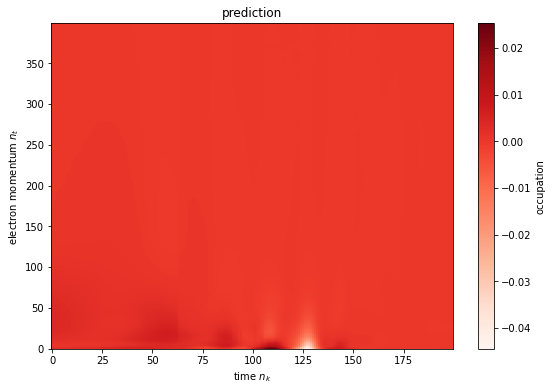

In [46]:
pred = model.predict(test_trajectory)
    
narrom.utils.plot_trajectory(pred,'prediction')

(400, 200)


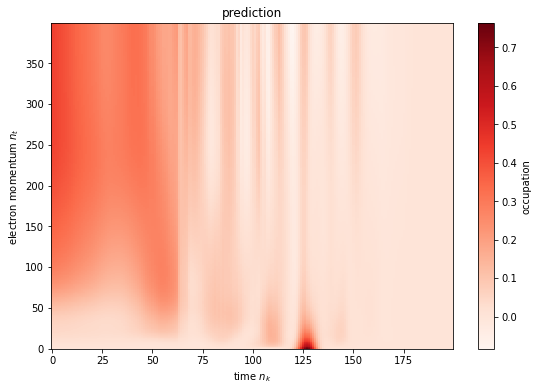

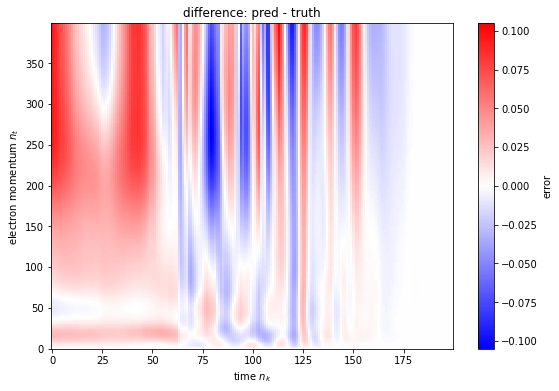

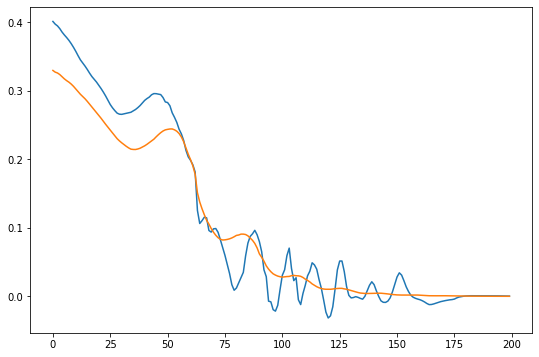

In [78]:
pred = model.forecast_mod2(test_trajectory[:1],test_trajectory.shape[0])

print(pred.shape)

narrom.utils.plot_trajectory(pred,'prediction')

narrom.utils.plot_difference(pred,test_trajectory,'difference: pred - truth')


ind=200
plt.plot(pred[ind])
plt.plot(test_trajectory[ind])
plt.show()